In [3]:
#testing by library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(x, y, model, title):
    # Create a mesh grid for plotting decision boundary
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for the grid
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    
# Plot the decision boundary and data points
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, cmap='coolwarm')
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.colorbar(label='Probability')
    plt.show()

In [4]:
def train_and_plot(x, y, title):
    # Train logistic regression model
    model = LogisticRegression(C=1/0.001, solver='lbfgs')
    model.fit(x, y)
    
    # Plot decision boundary
    plot_decision_boundary(x, y, model, title)

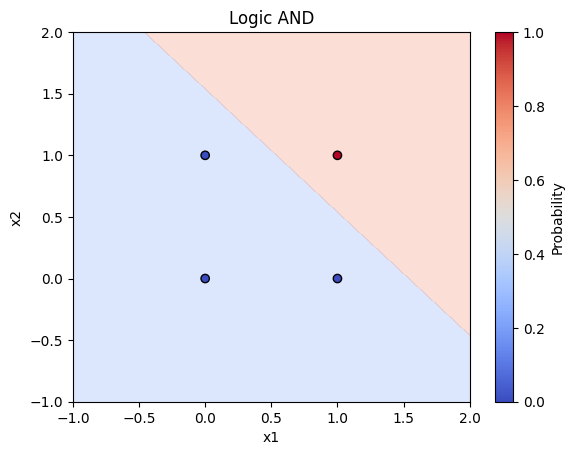

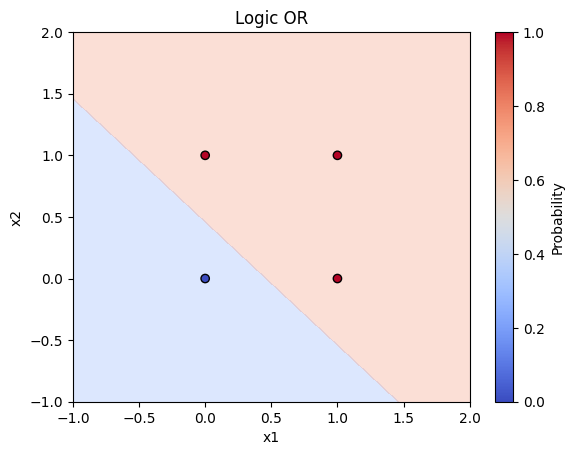

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

In [5]:
def main():
    # AND logic dataset
    x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    train_and_plot(x_and, y_and, "Logic AND")

    # OR logic dataset
    x_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    train_and_plot(x_or, y_or, "Logic OR")

    # XOR logic dataset with interaction feature
    x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    interaction_feature = (x_xor[:, 0] * x_xor[:, 1]).reshape(-1, 1)  # Adding interaction feature
    x_xor = np.hstack((x_xor, interaction_feature))
    y_xor = np.array([0, 1, 1, 0])
    train_and_plot(x_xor, y_xor, "Logic XOR with Interaction Feature")

if __name__ == '__main__':
    main()
